# Modeling and Simulation in Python
Allen B Downey

Working through this book. Notes from reading and example code. Implementing things without using the class package.

## Intro

***

**This book's immediate goal:** writing simulations of physical systems

In [2]:
import numpy as np
import scipy as sp
import matplotlib as plt
import pandas as pd
import sympy as sym
import pint as pt

## Modeling

***

*All models are wrong, but some are useful*
    -George Box

**abstraction:** deciding what details can be left out
**a model** description of a system that includes only the features we think are essential. the goal of the modeling process is to find the model best suited to its purpose (prediction, explanation, or design)

**often a simple model is better.** if we include only the essential features and leave out the rest,we get models that are easier to work with, and the explanations they provide can be cleaer and more compelling. start with a simple model, even if it is too simple, and test whether it is good enough  for its purpose.


In [2]:
from pint import UnitRegistry
unitsR = UnitRegistry()

#penny falling from the empire state building
a = 9.8 * unitsR.meter / unitsR.second**2
print( a )
print( a.units )
print( a.dimensionality )

9.8 meter / second ** 2
meter / second ** 2
[length] / [time] ** 2


In [3]:
h = 381 * unitsR.meter
t = np.sqrt( 2 * h / a )
v = round( a * t, 2 )
print( v )

86.42 meter / second


In [4]:
#convert to miles/hour
mile = unitsR.mile
hour = unitsR.hour
round( v.to(mile/hour), 2 )

193.32 <Unit('mile / hour')>

In [5]:
#if same dimensionality, will convert to units of first variable
foot = unitsR.foot
pole_height = 10 * foot

In [6]:
pole_height + h

1260.0 <Unit('foot')>

In [7]:
h + pole_height

384.048 <Unit('meter')>

In [8]:
#but what about terminal velocity?
#How long will it take a penny to land from the top of the 
#empire state building when we take into account that the penny 
#reaches a terminal velocity of 18 meters/second?
meter = unitsR.meter
second = unitsR.second

# How long until the penny reaches 18 m/s with constant acceleration a.
termV = 18 * meter / second
time2termV = termV / a

# How far would the penny fall during that time?
dist2termV = a * time2termV**2 / 2

# How long to fall the remaining distance 
#with constant velocity 18 m/s?
remainingDist = h - dist2termV
timeRemainingDist = remainingDist / termV

# STotal time for penny to fall 381 m
totalTime = time2termV + timeRemainingDist
totalTime

22.085034013605444 <Unit('second')>

## Bike Share 

***

a simple model of a bike share system.

In [3]:
#define a state object to collect state variables to simulate the bikes at each location
class State(object):
    olin = 0
    wellesley = 0   

In [4]:
#an instance 
bikeshare = State( )

In [11]:
bikeshare.wellesley = 2
bikeshare.olin = 10
vars( bikeshare )

{'wellesley': 2, 'olin': 10}

In [12]:
#a student moves a bike from olin to wellesley
bikeshare.olin -= 1
bikeshare.wellesley += 1
vars( bikeshare )

{'wellesley': 3, 'olin': 9}

In [13]:
#def a fxn to move a bike from olin to welesley & vice versa
def bike_to_wellesley():
    print( 'a bike goes to Wellesley' )
    bikeshare.olin -= 1
    bikeshare.wellesley += 1
    
def bike_to_olin():
    print( 'a bike goes to Olin' )
    bikeshare.olin += 1
    bikeshare.wellesley -= 1

In [14]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_wellesley()
print( bikeshare.olin, bikeshare.wellesley )

9 3
a bike goes to Wellesley
8 4


In [15]:
print( bikeshare.olin, bikeshare.wellesley )
bike_to_olin()
print( bikeshare.olin, bikeshare.wellesley )

8 4
a bike goes to Olin
9 3


In [16]:
#return a T/F bool result with a given probability
import random

def flip( probability ):
    return random.random() < probability

In [17]:
if flip( 0.5 ): #fair coin flip
    print( 'heads' )
else:
    print( 'tails' )
        

heads


In [18]:
#simulate a time step of one minute
#the chance that a student arrives during a one minute periodis 50% at Wellesley
# " ... " 33% at Olin
def step():
    if flip( 0.5 ):
        bike_to_wellesley()
    if flip( 0.33 ):
        bike_to_olin()

In [19]:
step()
vars( bikeshare )

a bike goes to Wellesley


{'wellesley': 4, 'olin': 8}

**Generalization** adding parameters to a function is called generalization because it makes the function more general, that is, less specialized.

In [20]:
#the probabilities might change. let's rewrite the step fxn to take the propabilities as parameters
def step( p1, p2 ):
    if flip( p1 ):
        bike_to_wellesley()
    if flip( p2 ):
        bike_to_olin()    

In [21]:
step( 0.7, 0.2 )

a bike goes to Wellesley


In [22]:
for i in range( 4 ):
    bike_to_wellesley()

a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley


In [23]:
vars( bikeshare )

{'wellesley': 9, 'olin': 3}

In [24]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [25]:
bikeshare.wellesley = 20
bikeshare.olin = 20
num_step = 30

rOlin = pd.Series(np.zeros(num_step))
rWellesley = pd.Series(np.zeros(num_step))

for i in range( num_step ):
    step( 0.3, 0.2 )
    rOlin[i] = bikeshare.olin
    rWellesley[i] = bikeshare.wellesley

a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley
a bike goes to Olin
a bike goes to Wellesley


In [26]:
print( 'Olin mean = ', str( rOlin.mean() ) )
print( 'Wellesley mean = ', str( rWellesley.mean() ) )

Olin mean =  16.766666666666666
Wellesley mean =  23.233333333333334


In [27]:
data = {'Olin':rOlin, 'Wellesley':rWellesley, 'x':range(num_step)}
df = pd.DataFrame( data )

Text(0, 0.5, 'Number of Bikes')

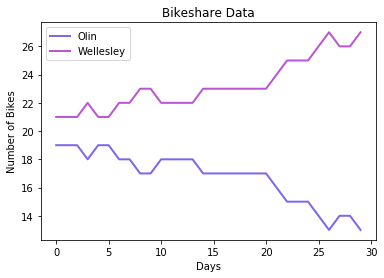

In [28]:
# multiple line plot
import matplotlib.pyplot as plt

plt.plot( 'x', 'Olin', data=df, marker='', color='mediumslateblue', linewidth=2, label="Olin")
plt.plot( 'x', 'Wellesley', data=df, marker='', color='mediumorchid', linewidth=2, label="Wellesley")
plt.legend()
plt.title('Bikeshare Data')
plt.xlabel('Days')
plt.ylabel('Number of Bikes')


## Iterative Modeling

***

The process we use to make models less wrong
**iterative modeling** identifying important problems, making improvements, and repeating the process. It often takes several iterations to develop a model that is good enough for the inteded purpose, but no more complicated than necessary.

In [29]:
def bike_to_wellesley( state ):
    state.olin -= 1
    state.wellesley += 1

In [30]:
bike_to_wellesley( bikeshare )

Now we  can create as many `State` objects as we want & update them independently:

In [31]:
bikeshare1 = State( )
bikeshare1.wellesley = 2
bikeshare1.olin = 10
bikeshare1.wellesley_empty = 0
bikeshare1.olin_empty = 0
print( vars( bikeshare1 ) )
bikeshare2 = State( )
bikeshare2.wellesley = 10
bikeshare2.olin = 2
bikeshare2.wellesley_empty = 0
bikeshare2.olin_empty = 0
print( vars( bikeshare2 ) )

{'wellesley': 2, 'olin': 10, 'wellesley_empty': 0, 'olin_empty': 0}
{'wellesley': 10, 'olin': 2, 'wellesley_empty': 0, 'olin_empty': 0}


In [32]:
bike_to_wellesley( bikeshare1 )
bike_to_wellesley( bikeshare2 )
print( vars( bikeshare1 ) )
print( vars( bikeshare2 ) )

{'wellesley': 3, 'olin': 9, 'wellesley_empty': 0, 'olin_empty': 0}
{'wellesley': 11, 'olin': 1, 'wellesley_empty': 0, 'olin_empty': 0}


### Documentation

**docstrings** a string in triple-quotes that appears at the beginning of a function and information on how to use the function:
1. The first line is a single sentence that describes what the fxn does
2. The following lines tell what each of the parameters are

**comments** use liberally to explain something that would not be obvious to somene reading the program.

In [33]:
def bike_to_olin( state ):
    """Move one bike from Wellesley to Olin.
    
    state: State object"""
    #We decrease one state variable and increase the other,
    #so the total number of bikes is unchanged.
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [34]:
def bike_to_wellesley( state ):
    """Move one bike from Olin to Wellesley.
    
    state: State object"""
    #We decrease one state variable and increase the other,
    #so the total number of bikes is unchanged.
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.wellesley += 1
    state.olin -= 1

Python Comparison Operators

|       Operation       | Symbol |
|:---------------------:|:------:|
|       Less than       |    <   |
|      Greater than     |    >   |
|   Less than or equal  |   <=   |
| Greater than or equal |   >=   |
|         Equal         |   ==   |
|       Not equal       |   !=   |

### Metrics

**stochastic** events are random  
**deterministic** events do the same thing every time they run

In [35]:
def run_simulation( state, p1, p2, num_steps ):
    """Simulate the given number of time steps
    state: State Object
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    rOlin = pd.Series(np.zeros(num_step))
    rWellesley = pd.Series(np.zeros(num_step))

    for i in range( num_step ):
        step( state, p1, p2 )
        rOlin[i] = state.olin
        rWellesley[i] = state.wellesley
        
    plt.plot(rOlin, label= ' Olin ' )  
    plt.plot(rWellesley, label= ' Wellesley ' )  
        

def step( state, p1, p2 ):
    """simulate a single time step
    state: State Object
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    """
    if flip( p1 ):
        bike_to_wellesley( state )
    if flip( p2 ):
        bike_to_olin( state )         

initial state:  {'wellesley': 2, 'olin': 50, 'wellesley_empty': 0, 'olin_empty': 0}


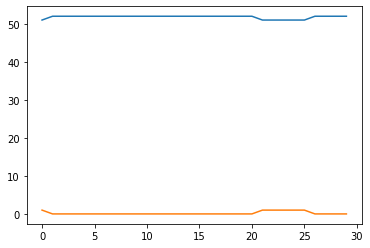

In [36]:
bikeshare1 = State( )
bikeshare1.wellesley = 2
bikeshare1.olin = 50
bikeshare1.wellesley_empty = 0
bikeshare1.olin_empty = 0
print( 'initial state: ', vars( bikeshare1 ) )

run_simulation( bikeshare1, 0.1, 0.8, 200 )

In [37]:
print( bikeshare1.olin_empty, bikeshare1.wellesley_empty )

0 14


because this little simulation is stochastic, the results are different every time they are run.

## Sweeping Parameters

***


In [38]:
def run_simulation( p1, p2, num_steps ):
    """Simulate the given number of time steps
    p1: probability of Olin->Wellesley customer arrival
    p2: probability of Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State( )
    state.wellesley = 2
    state.olin = 10
    state.wellesley_empty = 0
    state.olin_empty = 0

    for i in range( num_step ):
        step( state, p1, p2 ) 
        
    return state    

In [39]:
state = run_simulation( 0.2, 0.4, 20 )

In [40]:
print( state.olin_empty, state.wellesley_empty )

0 9


In [41]:
#using linspace
p1_array = np.linspace( 0, 1, 5 )

for p1 in p1_array:
    print( p1 )

0.0
0.25
0.5
0.75
1.0


**Sweeping a Parameter:** run simulations as a function of a range of values for one parameter to observe the effects on a different parameter.

In [42]:
p1_array = np.linspace( 0,1,11 )
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    state = run_simulation( p1, p2, num_steps )
    print( p1, state.olin_empty )

0.0 0
0.1 0
0.2 0
0.30000000000000004 0
0.4 0
0.5 2
0.6000000000000001 4
0.7000000000000001 4
0.8 11
0.9 14
1.0 15


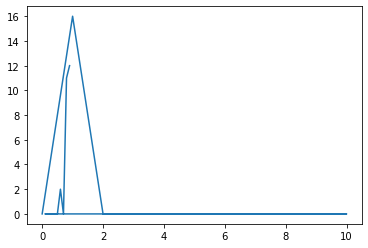

In [43]:
sweep_p1 = pd.Series(np.zeros(len(p1_array)))

for p1 in p1_array:
    state = run_simulation( p1, p2, num_steps )
    sweep_p1[p1] = state.olin_empty
    
plt.plot( sweep_p1, label="Olin")    

### Incremental Development

1. Always start with a working program. Run it and confirm that it does what you'd like
2. Make one small testable change at a time. Check by rerunning the program
3. Does the program run? If so, move on to the next change to be made. If not, go back and debug.
4. Sometimes you have to write extra code to verify/visualize that the changes you made work. such code is called **scaffolding**

## World Population

***

try to explain world population growth since 1950 and generate predictions for the next 50-100 years.

In [44]:
from pandas import read_html
filename = '/home/bonzilla/Desktop/MSDS2020/DATA604_SimPy/ModSimPy/ModSimPy/notebooks/data/World_population_estimates.html'

tables = read_html( filename, header=0, index_col=0, decimal = 'M')

In [45]:
len( tables )

6

In [46]:
table2 = tables[2]
table2.columns = [ 'census' , 'prb' , 'un' , 'maddison' , 'hyde' , 'tanton' , 
                  'biraben' , 'mj' , 'thomlinson' , 'durand' , 'clark' ]
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
#use dot operator to select collumns

census = pd.Series( table2.census / 1e9 )
un = pd.Series( table2.un /1e9 )

#1e9 is a less error prone way of writing 1000000000, a billion

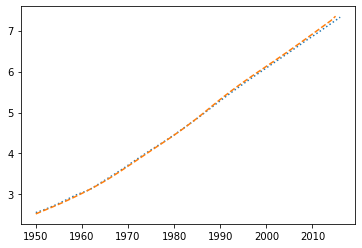

In [48]:
plt.plot( census, ':', label = 'US Census')
plt.plot( un, '--', label = 'UN DESA')

### Constant Growth Model

***

a roughly linear growth since 1960

In [49]:
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0

annual_growth = total_growth / elapsed_time
print( annual_growth )


0.07224800083333333


In [50]:
#start with the observed population from 1950 and add annual_growth each year
results = pd.Series(np.zeros(len(census)))
results[0] = p_0

for t in np.linspace( 0, len(census)-1, len(census)-1, endpoint=False ):
    #print(t)
    results[t+1] = results[t] + annual_growth
    
#results 
census

df = pd.DataFrame({'time':list(census.index[:]), 
                   'censusDat': list(census[:]), 
                   'linearFit': list(results[:]),
                   'unDat': list(un[:])})
df.head()

,time,censusDat,linearFit,unDat
0,1950,2.557629,2.557629,2.525149
1,1951,2.594940,2.629877,2.572851
2,1952,2.636772,2.702125,2.619292
3,1953,2.682053,2.774373,2.665865
4,1954,2.730228,2.846621,2.713172


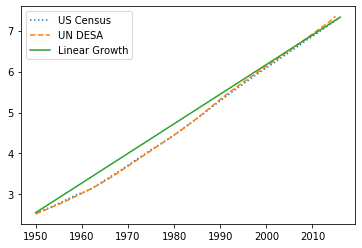

In [51]:
plt.plot( df.time, df.censusDat, ':', label = 'US Census')
plt.plot( df.time, df.unDat, '--', label = 'UN DESA')
plt.plot( df.time, df.linearFit, label = 'Linear Growth')
plt.legend()

## Modeling Growth

***

**State Objects** contain state variables which represent the state of the system which gets updated in the course of the sumlation  
**System Objects** contain system variables which represent parameters of the system which usually don't get updated over the course of the simulation.
  
Using system objects really does a lot to help organize code and makes a difference when running larger and more complex simulations

In [52]:
#put static parameters that are needed to model the system in thier own state object
system = State()
system.t_0 = t_0
system.t_end = t_end
system.p_0 = p_0
system.annual_growth = annual_growth

vars( system )

{'t_0': 1950,
 't_end': 2016,
 'p_0': 2.557628654,
 'annual_growth': 0.07224800083333333}

In [53]:
#wrap previous fxn to take the system object
def run_simulation1( system ):
    """Simulate the given number of time steps
    system: System object
    """
    num_steps = np.linspace( system.t_0, system.t_end, (system.t_end-system.t_0), endpoint=False )
    results = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    results.loc[system.t_0] = system.p_0

    for i in num_steps:
        results.loc[i+1] = results.loc[i] + system.annual_growth
        
    return results

#funcion to plot the results
def plot_results( census, un, timeseries, title ):
    """Plot the results of run_simulation
    census: data Series
    un: data Series
    timeseries: run_simulation results series
    title: string
    """
    plt.plot( census, ":", label = 'US Census' )
    plt.plot( un, "--", label = 'UN DESA' )
    plt.plot( timeseries, color='gray', label = 'model' )
    plt.legend()
    plt.title(title)
    plt.ylabel('World Population (billions)')
    plt.xlabel('Year')
    

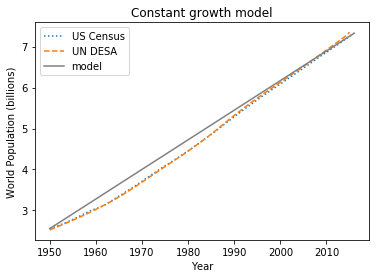

In [54]:
results = run_simulation1( system )
plot_results( census, un, results, 'Constant growth model')

### Proportional Growth

***

Constant Growth is not very realistic. Next, 'improve' the model by taking into account the population birth and death rates..

In [55]:
def run_simulation2( system ):
    """Simulate proportional growth
    system: System object
    """
    num_steps = np.linspace( system.t_0, system.t_end, (system.t_end-system.t_0), endpoint=False )
    results = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    results.loc[system.t_0] = system.p_0

    for i in num_steps:
        births = system.birth_rate * results.loc[i]
        deaths = system.death_rate * results.loc[i]
        results.loc[i+1] = results.loc[i] + births - deaths
        
    return results

In [56]:
system.death_rate = 0.01
system.birth_rate = 0.027

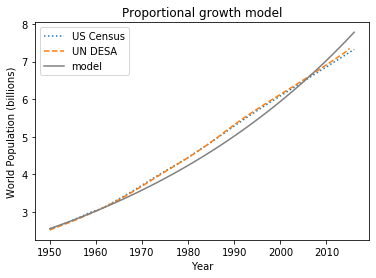

In [57]:
results = run_simulation2( system )
plot_results( census, un, results, 'Proportional growth model')

In [58]:
#factoring out the update function:
def update_fxn1( pop, t, system ):
    """run_sumulation update function with system.birth_rate and system.death_rate
    pop: current population
    t: index variable
    system: system object"""
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return pop + births - deaths

In [59]:
#revise run_simulation
def run_simulation( system, update_fxn ):
    """Simulate proportional growth
    system: System object
    update_fxn1: function that updates population
    """
    num_steps = np.linspace( system.t_0, system.t_end, (system.t_end-system.t_0), endpoint=False )
    results = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    results.loc[system.t_0] = system.p_0

    for i in num_steps:
        results.loc[i+1] = update_fxn( results.loc[i], i, system )
        
    return results

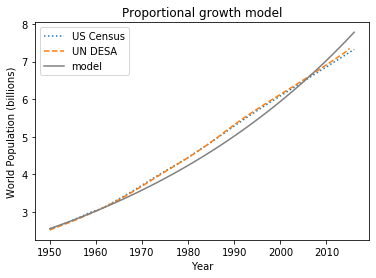

In [60]:
results = run_simulation( system, update_fxn1 )
plot_results( census, un, results, 'Proportional growth model')

In [61]:
#combining birth and death
system.alpha = system.birth_rate - system.death_rate

**alpha** is a conventional term for a system's growth rate

In [62]:
def update_fxn2( pop, t, system ):
    """run_sumulation update function with system.alpha
    pop: current population
    t: index variable
    system: system object"""
    net_growth = system.alpha * pop
    return pop + net_growth

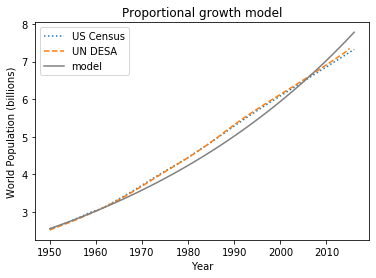

In [63]:
results = run_simulation( system, update_fxn2 )
plot_results( census, un, results, 'Proportional growth model')

## Quadratic Growth

***
  
it makes sense that the net growth should depend on the current population, but perhaps it's a linear relationship is not the best model.  
nest we implement a quadratic model of the form:

$$Net Growth = \alpha*population + \beta*population$$

In [64]:
def update_fxn_quad( pop, t, system ):
    """run_sumulation update quadratic function 
    pop: current population
    t: index variable
    system: system object"""
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

In [65]:
system.alpha = 0.025
system.beta = -0.0018

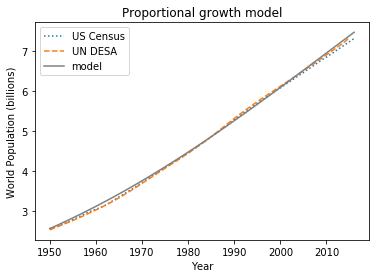

In [66]:
results = run_simulation( system, update_fxn_quad )
plot_results( census, un, results, 'Proportional growth model')

Text(0, 0.5, 'Net Growth (Billions)')

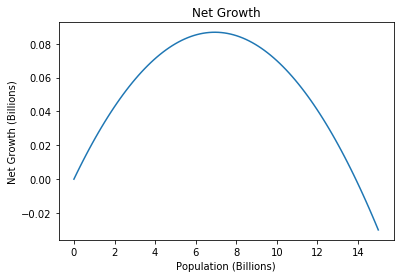

In [67]:
#a closer look at net growth
pop_array = np.linspace( 0, 15, 100 )
net_growth_array = ( system.alpha * pop_array + system.beta * pop_array**2 )
plt.plot( pop_array, net_growth_array )
plt.title( 'Net Growth' )
plt.xlabel( 'Population (Billions)' )
plt.ylabel( 'Net Growth (Billions)')

**Quadratic Population Growth**
1. when the population is small (<4B) the net growth is proportional to the population.
2. when the population is high (4B <=pop<=10B) the net growth is relatively high
3. when the population get too high (>10B) the growth slows down (resource limitations)
4. if the population gets excessively high, (>14B) the death rate overtakes the growth rate and net growth becomes negative.


### Equilibrium

To find the equilibrium points of the system, we look to find the roots, or zero points of the quadratic equation:
$$\Delta p = \alpha p + \beta p^2 = p (\alpha + \beta p)$$  
In the context of population modeling, the quadratic model is more conventionally written as:
$$\Delta p = r p (1 - \frac{p}{K})$$

where $r = \alpha$ == the maximum growth rate observed when $p$ is small and $K$ is the equilibrium point. $K = -\alpha/\beta$ == the carrying capacity of the system it indicates the maximum population the environment can sustain.

In [68]:
def carrying_capacity(system):
    """compute the carrying capacity of a system
    system: a System object"""
    K = -system.alpha / system.beta
    return K

sys1 = State()
sys1.alpha = 0.025
sys1.beta = -0.0018
pop = carrying_capacity(sys1)
print(pop)

13.88888888888889


## Prediction

***

use the quadratic model to generate projections of future growth

In [69]:
system = State()
system.t_0 = t_0
system.t_end = t_end
system.p_0 = p_0
system.alpha = 0.025
system.beta = -0.0018

vars( system )

{'t_0': 1950,
 't_end': 2016,
 'p_0': 2.557628654,
 'alpha': 0.025,
 'beta': -0.0018}

In [70]:
#to generate a projection, just change the end date
system.t_end = 2250
results = run_simulation( system, update_fxn_quad )

(2, 14)

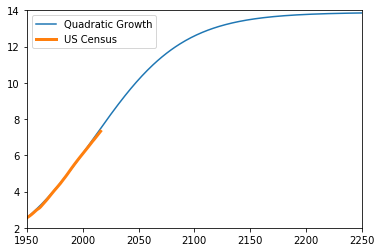

In [71]:
#plot the results
#plot_results( census, un, results, 'Proportional growth model')
plt.plot( results.index, results.values, label = 'Quadratic Growth' )
plt.plot( df.time, df.censusDat, linestyle="solid", linewidth = 3, label = 'US Census')
plt.legend()
plt.xlim(1950,2250)
plt.ylim(2,14)

### Comparing Projections

In [72]:
table3 = tables[3]
table3.columns = [ 'census' , 'prb' , 'un' ]
table3.head()

,census,prb,un
Year,,,
2016,7.334772e+09,NaN,7.432663e+09
2017,7.412779e+09,NaN,NaN
2018,7.490428e+09,NaN,NaN
2019,7.567403e+09,NaN,NaN
2020,7.643402e+09,NaN,7.758157e+09


In [73]:
def plot_projections( table ):
    """plot projections
    table: pd.DataFrame of tabular data"""
    census_proj = table.census / 1e9
    un_proj = table.un / 1e9
    plt.plot( census_proj.dropna(), 'b:', label = 'US Census')
    plt.plot( un_proj.dropna(), 'g--', label = 'UN DESA')

In [74]:
system.t_end = 2100
results = run_simulation( system, update_fxn_quad)

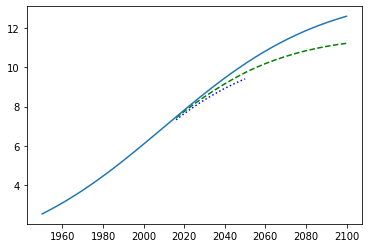

In [75]:
plot_projections( table3 )
plt.plot( results.index, results.values, label = 'Quadratic Growth' )

## Analysis

***

**recurrence relation** results can be predicted by  a geometric progression
**discrete** only defined by integer values
**continuous** defined by continuous values
**differential equation** an equation that related derivatives, or a function of functions.
  
for the population growth model, we are interested in the solution to 
$$x(t) = x_0 exp(\alpha t)$$
where $t = 0, x(t) = C$, so $C = x_0$

**simulation** use code to model changes in the system as a function of something measurable (e.g. time)
**analysis** comes in the form of algebra... symbolic manipuation.
1. with analysis we can compute exact values
2. analysis procides computational shortcuts
3. can use analysis to support generalizations about the system
4. analysis provides insights into the system.

**Symbolic Computation**

In [76]:
from sympy import *

In [77]:
t = symbols( 't' )
expr = t + 1
expr.subs( t, 2 )

3

In [78]:
f = Function( 'f' )

In [79]:
#differential equations in SymPy
dfdt = diff( f(t), t )
alpha = symbols( 'alpha' )
equ1 = Eq( dfdt, alpha*f(t) )

The result is an object that represents the following equation:
$$\frac{d}{dt}f(t) = \alpha f(t)$$

In [80]:
#use desolve for this differential equation
solution_eq = dsolve( equ1 )

the result is the **Exponential Growth Curve**:
$$f(t) = C_1 exp(\alpha t)$$

In [81]:
#create two more symbols
C1, p_0 = symbols( 'C1 p_0' )

#perform the substitution
particular = solution_eq.subs( C1, p_0 )

solving the quadratic growth model with the parameters $r$ and $K$, the **Logistic Growth Curve**:

$$f(t) = \frac{K}{1 + A exp(-rt)}$$
where $A = \frac{(K - p_0)}{p_0}$

|   Growth Type   |           Differential Equation           |
|:---------------:|:-----------------------------------------:|
|     Constant    |       linear: $x_n = p_0 + \alpha n$      |
|   Proportional  |   geometric: $x_n = p_0(1 + \alpha )^n$   |
|     Constant    |      linear: $x(t) = p_0 + \alpha t$      |
|   Proportional  |       exp: $x(t) = p_0exp(\alpha t)$      |
|    Quadratic    |    quadratic: $x(t) = \frac{K}{(1 + Aexp(-rt)}$   |

## Case Studies

***

Review of things we learned:
1. Pint to define units
2. state objects to keep track of variables that change within a system
3. the flip function to simulate random variables
4. defining functions
5. for loops to iterate over a range of a variable
6. Series objects to keep track of how one variable varies as a function of another
7. comparison operators to check conditions
8. run_simulation variable to iterate through states of a system
9. used System() objects to hold static state system variables
10. update function to take a current state and calculate the next future state
11. use Sympy to create Symbol objects.

## Epidemiology

***

applying the SIR model to the Freshman Plague. [The SIR Model for Spread of Disease]('https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease')

### The Freshman Plague

use a well-known model, the Kermack-McKendrick model, to explain the progression of the disease over the course of the semester, predict the effectof possible interventions, and design the most effective intervention campaigns

### The SIR Model
1. **S for Susceptible** people capable of contracting the disease
2. **I for Infectious** people capable of passing on the disease
3. **R for Recovered** people considered immune to reinfection


* $\gamma$ : recovery rate (people recovered/day)
* $N$ : population size
* $i$ : number of currently infectious
* $\beta$ : people contacted rate (people contacted/day)
* $s$ : fraction of population that is susceptible

The total number of recoveries expected per day is $\gamma i N$.  
The fraction of the population that recovered each day is $\gamma i$  
The number of new infections expected per day is $\beta s i N$  
The fraction of the population that gets infected in a day is $\beta s i$

The **SIR** equations
1. $\frac{ds}{dt} = -\beta si$
2. $\frac{di}{dt} = \beta si - \gamma i$
1. $\frac{dr}{dt} = -\gamma i$

**implementation:** the process of representing a model be it through schematics, equations, or code.

In [5]:
init = State( )
init.S = 89
init.I = 1
init.R = 0
vars( init )

{'S': 89, 'I': 1, 'R': 0}

In [6]:
totalPop = ( init.S + init.R + init.I )
init.S /= totalPop
init.R /= totalPop
init.I /= totalPop

In [7]:
vars(init)

{'S': 0.9888888888888889, 'I': 0.011111111111111112, 'R': 0.0}

In [8]:
tc = 3 #time between contacts
tr = 4 #recovery time
beta = 1/tc #contact rate per day
gamma = 1/tr #recovery rate per day

In [13]:
def make_system( beta, gamma ):
    """make a SIR system object"""
    init = State( )
    init.S = 89
    init.I = 1
    init.R = 0
    totalPop = ( init.S + init.R + init.I )
    init.S /= totalPop
    init.I /= totalPop
    init.R /= totalPop
    t0 = 0
    t_end = 7*14
    system = State( )
    system.init=init, 
    system.t0=t0, 
    system.t_end=t_end, 
    system.beta=beta, 
    system.gamma=gamma
    return system

In [11]:
def update_func( state, t, system ):
    s = state.S
    i = state.I
    r = state.R
    
    infected = system.beta[0] * i * s
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    state.S = s
    state.I = i
    state.R = r
    
    return state

In [14]:
system = make_system( beta, gamma )
state = update_func( init, 0, system )
vars( state )

{'S': 0.9852263374485597, 'I': 0.011995884773662552, 'R': 0.002777777777777778}

In [15]:
def run_simulation( system, update_func ):
    num_steps = np.linspace( system.t0[0], system.t_end[0], (system.t_end[0]-system.t0[0]), endpoint=False )
    #print( system.t_end[0])
    S = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    I = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    R = pd.Series(np.zeros(len(num_steps)), index=num_steps)
    state = system.init[0]
    t0 = system.t0
    S.loc[t0] = state.S
    I.loc[t0] = state.I
    R.loc[t0] = state.R
    
    #print( S )
    for t in num_steps:
        #print( t )
        state = update_func( state, t, system )
        S.loc[t+1]  = state.S
        I.loc[t+1]  = state.I
        R.loc[t+1]  = state.R
        #print( state.S)
    return S, I, R    

In [16]:
system = make_system( beta, gamma );
S, I, R = run_simulation( system, update_func );

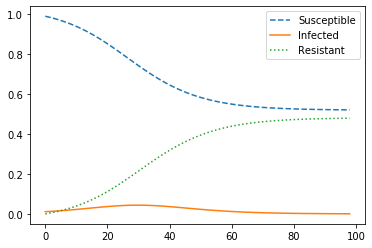

In [17]:
import matplotlib.pyplot as plt
plt.plot( S, '--', label = 'Susceptible' )
plt.plot( I, '-', label = 'Infected' )
plt.plot( R, ':', label = 'Resistant' )
plt.legend()
    

## Optimization

***

consider metrics intended to quantify the simulation.

In [87]:
#calculate the total infected
def calc_total_infected( results, system ):
    return results[0].iloc[0] - results[0].iloc[-1]

In [35]:
def add_immunization( system, fraction ):
    """model immunization by moving a given fraction from susceptible to recovered
    system: a System() object
    fraction: fraction of population to reallocate (int)"""
    print( system.init[0].S )#.S -= fractioninit = State( )
    system.init[0].S -= fraction
    system.init[0].R += fraction

In [42]:
system1 = make_system( beta, gamma )
system2 = make_system( beta, gamma )
add_immunization( system2, 0.1 );
S1, I1, R1 = run_simulation( system1, update_func )
S2, I2, R2 = run_simulation( system2, update_func )

0.9888888888888889


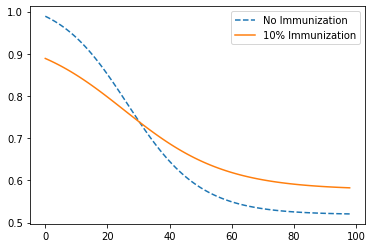

In [44]:
plt.plot( S1, '--', label = 'No Immunization' )
plt.plot( S2, label = '10% Immunization')
plt.legend()

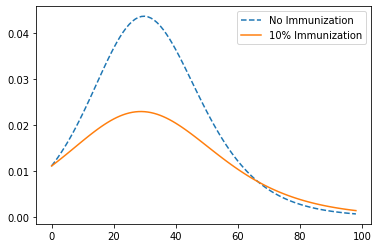

In [45]:
plt.plot( I1, '--', label = 'No Immunization' )
plt.plot( I2, label = '10% Immunization')
plt.legend()

Without immunization, almost 47% of the population gets infected at some point, but comparatively less with just 10% immunization.

In [90]:
#FRUSTRATION: THIS IS AN EXAMPLE OF BAD USE OF GLOBAL VARIABLES WITHIN FUNCTIONS
#sweep a range of immunities
def sweep_immunity( immunize_array ):
    sweep = pd.Series(np.zeros(len( immunize_array )), index=immunize_array )
    
    for fraction in immunize_array:
        sir = make_system( beta, gamma )
        add_immunization( sir, fraction )
        results = run_simulation( sir, update_func )
        #print( results )
        sweep[ fraction ] = calc_total_infected( results, sir )
        
    return sweep    

In [91]:
immunization_array = np.linspace( 0, 1, 101, endpoint=True );
sweptImmunity = sweep_immunity( immunization_array );
sweptImmunity

0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888888889
0.9888888888

0.00    0.468321
0.01    0.452171
0.02    0.435985
0.03    0.419770
0.04    0.403534
          ...   
0.96    0.000442
0.97    0.000285
0.98    0.000132
0.99   -0.000016
1.00   -0.000161
Length: 101, dtype: float64

Text(0, 0.5, 'Fraction Infected')

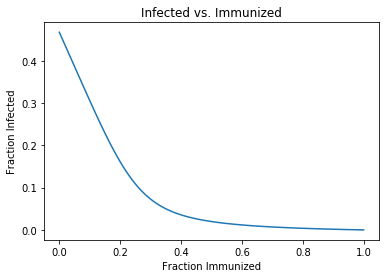

In [94]:
plt.plot( sweptImmunity )
plt.title('Infected vs. Immunized')
plt.xlabel('Fraction Immunized')
plt.ylabel('Fraction Infected')


In [95]:
def compute_factor( spending ):
    return logistic( spending, M=500, K=0.2, B=0.01 )

In [96]:
def add_hand_washing( system, spending ):
    factor = compute_factor( spending )
    system.beta *= ( 1-factor )

In [101]:
#sweep a range of immunities
def sweep_hand_washing( spending_array ):
    sweep = pd.Series(np.zeros(len( spending_array )), index=spending_array )
    
    for spending in spending_array:
        sir = make_system( beta, gamma )
        add_hand_washing( sir, spending )
        results = run_simulation( sir, update_func )
        #print( results )
        sweep[ spending ] = calc_total_infected( results, sir )
        
    return sweep 

In [102]:
spending_array = np.linspace( 0, 1200, 20 )
infected_sweep = sweep_hand_washing( spending_array )

NameError: name 'logistic' is not defined